**Implementação do algoritmo de Analise Exploratoria**
<br>
<br>
**Autor**: Caio Augusto de Souza Mota (*caiomota802@gmail.com*)

Data: 09/06/2021

**Revisor**: Carlos Eduardo Beluzo (*cbeluzo@gmail.com*)
<br>
<br>
*Codigo adaptado de Baligh Mnassri disponivel em: https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python/notebook*

---
Este código é parte do Trabalho de Conclusão de Curso apresentado como exigência parcial para obtenção do diploma do Curso de Tecnologia em Análise e Desenvolvimento de Sistemas do Instituto Federal de Educação, Ciência e Tecnologia de São Paulo Câmpus Campinas.



# 1. Importação de Bibliotecas, carga de dados e funções

In [ ]:
# instalando o Synapse Client
! pip install synapseclient

In [ ]:
import os
import synapseclient as syna
from getpass import getpass

import numpy as np
from math import sqrt
import pandas as pd


import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


## 1.1 Carregando base de dados disponícel no Synapse

In [ ]:
# BRNeodeath
# Recuperando a base de dados do repositório de dados Synapse
syn = syna.Synapse() 
syn.login(input('Sybapse User: '), getpass('Passwd:')) 
 
# Obtendo um ponteiro e baixando os dados
dataset = syn.get(entity='syn25575811') # ID do dataset BRNeodeath

df_ori = pd.read_csv(dataset.path)
df_ori

Sybapse User: caiomota802@gmail.com
Passwd:··········
Welcome, Caio Mota!



[WARNING] /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



,Unnamed: 0,maternal_age,tp_maternal_schooling,tp_marital_status,tp_maternal_race,num_live_births,num_fetal_losses,num_previous_gestations,num_normal_labors,num_cesarean_labor,tp_pregnancy,newborn_weight,gestaional_week,cd_apgar1,cd_apgar5,has_congenital_malformation,tp_newborn_presentation,num_prenatal_appointments,tp_labor,was_cesarean_before_labor,was_labor_induced,tp_childbirth_care,tp_robson_group,is_neonatal_death,birth_date,death_date,birth_year,uf,id
0,0,34,3,2,1,4,0,4,1,3,1,3160,38,9,10,2,1,10,2,2,2,2,5,0,2014-01-01,NaN,2014,SP,189276
1,1,28,9,1,4,1,0,1,1,0,1,2705,37,10,10,2,1,2,1,9,1,2,4,0,2014-01-01,NaN,2014,SP,189300
2,2,23,4,2,1,0,0,0,0,0,1,1790,32,8,9,2,1,5,2,1,2,5,10,0,2014-01-01,NaN,2014,SP,189980
3,3,29,4,4,4,1,0,1,1,0,1,3060,36,8,10,2,1,6,1,9,1,5,10,0,2014-01-01,NaN,2014,SP,189982
4,4,21,4,5,1,0,0,0,0,0,1,2880,40,7,9,2,1,7,1,9,2,5,1,0,2014-01-01,NaN,2014,SP,190057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6760217,6760217,16,4,1,4,0,0,0,0,0,1,675,24,2,1,2,1,3,1,3,2,2,10,1,2016-12-31,2016-12-31,2016,CE,7607242
6760218,6760218,24,4,1,4,2,0,2,2,0,1,2350,38,2,0,1,1,7,1,3,1,5,4,1,2016-12-31,2016-12-31,2016,MT,14785247
6760219,6760219,24,5,1,4,0,0,0,0,0,1,2480,36,6,5,2,1,7,2,1,2,5,10,1,2016-12-31,2016-12-31,2016,PA,16321443
6760220,6760220,32,4,5,4,1,0,1,0,1,2,920,27,1,1,2,1,7,2,1,2,2,8,1,2016-12-31,2016-12-31,2016,PE,18502515


In [ ]:
df = df_ori.sample(frac=1).copy()
df.shape

(6760222, 29)

# 2. Etapa de pre-processamento de dados

Esta base já foi pre-processada, logo não precisa de tratamento de nulos. Apenas referencie ela dizendo que você recuperou ela do Synapse por link msm. Diz que ela não é pública, mas pode ser reconstruída a partir de dados públicos do SIM e SINASC.

O único campo com valores nulos é "death_date", que os registros dos vivos, logo o campo deve ser nulo. De qualquer forma liste as features que serão removidas.

birth_date                           0
death_date                     6719191
birth_year                           0
uf                                   0
id                                   0

Não precisa colocar código no TCC, apenas descritivo.

## Não incluir

In [ ]:
# verificar os valores ausentes nos dados de treino
df.isnull().sum()

Unnamed: 0                           0
maternal_age                         0
tp_maternal_schooling                0
tp_marital_status                    0
tp_maternal_race                     0
num_live_births                      0
num_fetal_losses                     0
num_previous_gestations              0
num_normal_labors                    0
num_cesarean_labor                   0
tp_pregnancy                         0
newborn_weight                       0
gestaional_week                      0
cd_apgar1                            0
cd_apgar5                            0
has_congenital_malformation          0
tp_newborn_presentation              0
num_prenatal_appointments            0
tp_labor                             0
was_cesarean_before_labor            0
was_labor_induced                    0
tp_childbirth_care                   0
tp_robson_group                      0
is_neonatal_death                    0
birth_date                           0
death_date               

In [ ]:
# Base final
features = ['maternal_age', 'tp_maternal_schooling', 'tp_marital_status',
               'tp_maternal_race', 'num_live_births','num_fetal_losses',
               'num_previous_gestations', 'num_normal_labors', 'num_cesarean_labor',
               'tp_pregnancy', 'newborn_weight', 'gestaional_week',
               'cd_apgar1', 'cd_apgar5', 'has_congenital_malformation',
               'tp_newborn_presentation', 'num_prenatal_appointments', 'tp_labor',
               'was_cesarean_before_labor', 'was_labor_induced', 'tp_childbirth_care',
               'tp_robson_group','is_neonatal_death']

df =  df[features]

In [ ]:
# Exibindo o nome de todas as colunas
colunas = df.columns
colunas

Index(['maternal_age', 'tp_maternal_schooling', 'tp_marital_status',
       'tp_maternal_race', 'num_live_births', 'num_fetal_losses',
       'num_previous_gestations', 'num_normal_labors', 'num_cesarean_labor',
       'tp_pregnancy', 'newborn_weight', 'gestaional_week', 'cd_apgar1',
       'cd_apgar5', 'has_congenital_malformation', 'tp_newborn_presentation',
       'num_prenatal_appointments', 'tp_labor', 'was_cesarean_before_labor',
       'was_labor_induced', 'tp_childbirth_care', 'tp_robson_group',
       'is_neonatal_death'],
      dtype='object')

In [ ]:
# Exibindo os valores de cada coluna (domínio de valores)
for col in colunas:
    print(col, ": ", df[col].dtype)
    print(df[col].unique(), "\n")

maternal_age :  int64
[16 29 19 20 17 31 18 21 28 33 35 27 26 25 41 22 23 39 15 36 24 30 34 38
 44 32 40 37 13 42 14 45 52 43 49 46 12 47 48 50 11 51 55 10 54 53  9  8] 

tp_maternal_schooling :  int64
[4 5 3 2 9 1 0] 

tp_marital_status :  int64
[5 2 1 9 4 3] 

tp_maternal_race :  int64
[1 4 2 9 3 5] 

num_live_births :  int64
[ 0  1  2  3  4  5  6  7  9 10  8] 

num_fetal_losses :  int64
[0 1 3 2 4 5] 

num_previous_gestations :  int64
[ 0  1  2  3  5  6  4  7  9  8 10] 

num_normal_labors :  int64
[ 0  2  1  3  4  5  6  7  9 10  8] 

num_cesarean_labor :  int64
[0 1 2 3 4 5 6] 

tp_pregnancy :  int64
[1 2 3 9] 

newborn_weight :  int64
[3100 3715  870 ... 5259 4509 5396] 

gestaional_week :  int64
[42 37 23 38 39 40 36 41 31 25 34 35 33 43 30 32 26 29 27 28 20 45 24 44
 22 21 19 15] 

cd_apgar1 :  int64
[ 7  9  2  8 10  6  4  5  3  1  0] 

cd_apgar5 :  int64
[ 9 10  2  8  7  6  5  4  3  1  0] 

has_congenital_malformation :  int64
[2 9 1] 

tp_newborn_presentation :  int64
[1 2 3 9]

In [ ]:
df.is_neonatal_death.value_counts()

0    6719191
1      41031
Name: is_neonatal_death, dtype: int64

## Incluir estas 4 tabelas como apendice, e citar no início da seção que estão disponíveis as tabelas sumário da base nos apendices XX, X1, X3 e X4.

### Características demográficas e socioeconômicas maternas

In [ ]:
aux = df[['maternal_age', 'tp_maternal_schooling', 'tp_marital_status', 'tp_maternal_race']].describe()
aux.to_csv("tab1.csv")
aux

,maternal_age,tp_maternal_schooling,tp_marital_status,tp_maternal_race
count,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06
mean,2.640135e+01,3.998664e+00,2.353587e+00,2.891212e+00
std,6.661190e+00,8.761812e-01,1.674027e+00,1.790013e+00
min,8.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.100000e+01,4.000000e+00,1.000000e+00,1.000000e+00
50%,2.600000e+01,4.000000e+00,2.000000e+00,4.000000e+00
75%,3.100000e+01,4.000000e+00,2.000000e+00,4.000000e+00
max,5.500000e+01,9.000000e+00,9.000000e+00,9.000000e+00


### Variáveis obstétricas maternas

In [ ]:
aux = df[['num_live_births','num_fetal_losses', 'num_previous_gestations', 
    'num_normal_labors', 'num_cesarean_labor','tp_pregnancy']].describe()
aux.to_csv("tab2.csv")
aux

,num_live_births,num_fetal_losses,num_previous_gestations,num_normal_labors,num_cesarean_labor,tp_pregnancy
count,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06
mean,9.434919e-01,2.175585e-01,1.142719e+00,6.418286e-01,3.291195e-01,1.027113e+00
std,1.219050e+00,5.296863e-01,1.392178e+00,1.182947e+00,6.264943e-01,2.557842e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+01,5.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,9.000000e+00


### Variáveis de histórico de gravidez

In [ ]:
aux = df[['num_prenatal_appointments', 'tp_labor', 'tp_robson_group']].describe()
aux.to_csv("tab3.csv")
aux

,num_prenatal_appointments,tp_labor,tp_robson_group
count,6.760222e+06,6.760222e+06,6.760222e+06
mean,7.806817e+00,1.574916e+00,4.009189e+00
std,2.899794e+00,5.282566e-01,2.676934e+00
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,6.000000e+00,1.000000e+00,2.000000e+00
50%,8.000000e+00,2.000000e+00,3.000000e+00
75%,1.000000e+01,2.000000e+00,5.000000e+00
max,4.000000e+01,9.000000e+00,1.100000e+01


### Variáveis relacionadas ao recém-nascido

In [ ]:
aux = df[['newborn_weight', 'gestaional_week',
               'cd_apgar1', 'cd_apgar5', 'has_congenital_malformation',
               'tp_newborn_presentation', 'tp_labor',
               'was_cesarean_before_labor', 'was_labor_induced', 'tp_childbirth_care'
               ,'is_neonatal_death']].describe()
aux.to_csv("tab4.csv")
aux

,newborn_weight,gestaional_week,cd_apgar1,cd_apgar5,has_congenital_malformation,tp_newborn_presentation,tp_labor,was_cesarean_before_labor,was_labor_induced,tp_childbirth_care,is_neonatal_death
count,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06,6.760222e+06
mean,3.187303e+03,3.848163e+01,8.348666e+00,9.355560e+00,2.114989e+00,1.153267e+00,1.574916e+00,4.149919e+00,2.090301e+00,3.716102e+00,6.069475e-03
std,5.506573e+02,2.195726e+00,1.214586e+00,8.703955e-01,9.272453e-01,9.509163e-01,5.282566e-01,3.442838e+00,1.442280e+00,1.904822e+00,7.767006e-02
min,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.905000e+03,3.800000e+01,8.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,3.215000e+03,3.900000e+01,9.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00
75%,3.522000e+03,4.000000e+01,9.000000e+00,1.000000e+01,2.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00
max,6.000000e+03,4.500000e+01,1.000000e+01,1.000000e+01,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,1.000000e+00


# 3. Etápa de Análise Exploratória

No grafico de pizza abaixo podemos ver os valores que temos em nosso rotulo sendo 99.4% dos dados de nascidos vivos e 0.6% de nascidos mortos, isso mostra para nos o quanto a base de dados esta desbalanceada.

[WARNING] /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':



<function matplotlib.pyplot.show>

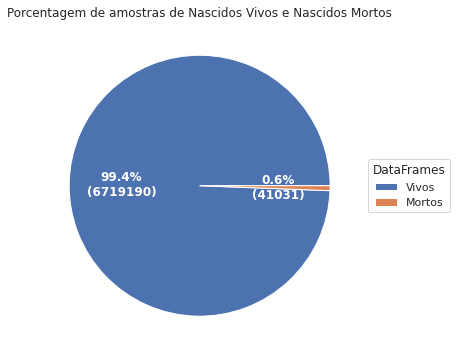

In [ ]:
fig,ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal"))

topic = ['Vivos','Mortos']
labels = list(topic)

data = [df['is_neonatal_death'].value_counts()]

def func(pct,allvals):
  absolute = int(pct/100.*np.sum(allvals))
  return "{:.1f}%\n({:d})".format(pct,absolute)

wedges,texts,autotexts = ax.pie(data,autopct=lambda pct: func(pct, data),textprops=dict(color="w"))

ax.legend(wedges,labels,title="DataFrames",loc= "center left",bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts,size=12,weight="bold")

ax.set_title("Porcentagem de amostras de Nascidos Vivos e Nascidos Mortos")
plt.show

<br>Nessa sessão plotamos graficos que nos ajuda a visualizar a distribuição que temos nos dados, vendo quais são as medias de cada variáveis.


No boxploit abaixo a variável utilizada foi "Peso ao nascer". Como podemos observar no peso ao nascer majoritariamente esta entre 3000 e 3500 gramas e com variáção média de 2000 a 4500 gramas. A média do peso ao nascer dos recem nascidos é de 3187 gramas.

In [ ]:
# Função pra imprimir boxplot
def print_boxplot(x_, y_, h_, lbl):
  legendas = ["Vivos", #0
              "Mortos", #1
              ]
  ax = sns.boxplot(x=x_, y=y_,  hue=h_, data=df)
  ax.set(xlabel='')
  ax.set(ylabel=lbl)
  ax.set_title('Distribuição da variável "%s"' % lbl)
  ax.set_xticklabels(['Vivos', 'Mortos'])

  h, l = ax.get_legend_handles_labels()
  ax.legend(h, legendas)

  ax.figure.savefig("y_.png")


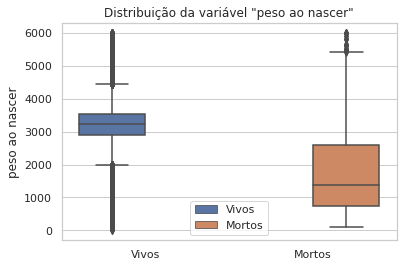

In [ ]:
print_boxplot('is_neonatal_death', 'newborn_weight', 'is_neonatal_death', 'peso ao nascer')

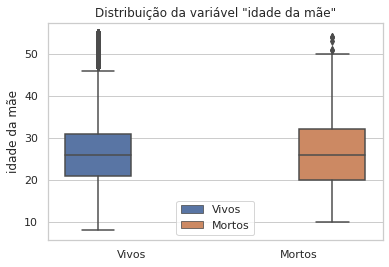

In [ ]:
print_boxplot('is_neonatal_death', 'maternal_age', 'is_neonatal_death', 'idade da mãe')

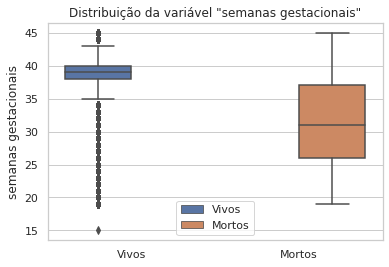

In [ ]:
print_boxplot('is_neonatal_death', 'gestaional_week', 'is_neonatal_death', 'semanas gestacionais')

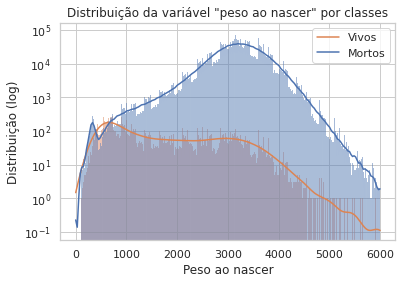

In [ ]:
legendas = ["Vivos", #0
            "Mortos", #1
            ]

ax = sns.histplot(data=df, x="newborn_weight", hue="is_neonatal_death", kde=True,
                  )
ax.set_yscale('log')

ax.set(xlabel='Peso ao nascer')
ax.set(ylabel='Distribuição (log)')
ax.set_title('Distribuição da variável "%s" por classes' % "peso ao nascer")

ax.legend(legendas)

ax.figure.savefig("ditro.png")


Nesse Grafico temos a distribuição dos dados da feature "anos de escolaridade da mãe", essa feature utiliza dados categoricos Nominais as categorias sao:
<br>1 - nenhum;
<br>2 - de 1 a 3 anos;
<br>3 - de 4 a 7 anos;
<br>4 - de 8 a 11 anos;
<br>5 - 12 e mais anos;
<br>9 - ignorado;

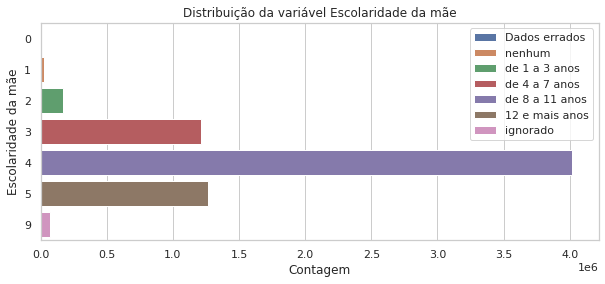

In [ ]:
plt.figure(figsize=(10,4))
titulo = "Distribuição da variável Escolaridade da mãe"
label_Y = "Escolaridade da mãe"
label_X = "Contagem"
legendas = ["Dados errados",
            "nenhum", #1
            "de 1 a 3 anos", #2
            "de 4 a 7 anos",#3
            "de 8 a 11 anos", #4
            "12 e mais anos",#6
            "ignorado"] #9

ax = sns.countplot(y = 'tp_maternal_schooling', hue='tp_maternal_schooling', dodge=False, data = df)
ax.set(xlabel=label_X)
ax.set(ylabel=label_Y)
ax.set_title(titulo)
ax.legend(loc='upper right', labels=legendas)
ax.figure.savefig("tp_maternal_schooling.png")

In [ ]:
# media Semana de gestação(por intervalos)
print('A média de "Anos de escolaridade da mãe" é %.0f' %(df["tp_maternal_schooling"].mean(skipna=True)))
# mediana Semana de gestação(por intervalos)
print('A mediana de  "Anos de escolaridade da mãe" é %.0f' %(df["tp_maternal_schooling"].median(skipna=True)))

A média de "Anos de escolaridade da mãe" é 4
A mediana de  "Anos de escolaridade da mãe" é 4


In [ ]:
print('Agrupamento dos anos de escolaridade da mãe:')
print(df['tp_maternal_schooling'].value_counts())

Agrupamento dos anos de escolaridade da mãe:
4    4018105
5    1264116
3    1210706
2     167339
9      71538
1      28218
0        200
Name: tp_maternal_schooling, dtype: int64


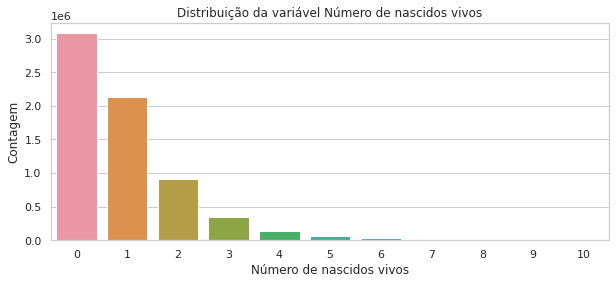

In [ ]:

variável = 'num_live_births'
plt.figure(figsize=(10,4))
titulo = "Distribuição da variável Número de nascidos vivos"
label_X = "Número de nascidos vivos"
label_Y = "Contagem"

ax = sns.countplot(x = 'num_live_births', dodge=False, data = df)
ax.set(xlabel=label_X)
ax.set(ylabel=label_Y)
ax.set_title(titulo)
ax.figure.savefig("num_live_births.png")

In [ ]:
# media Semana de gestação(por intervalos)
print('A média de "Número de nascidos vivos da mãe" é %.1f' %(df["num_live_births"].mean(skipna=True)))
# mediana Semana de gestação(por intervalos)
print('A mediana de  "Número de nascidos vivos da mãe" é %.0f' %(df["num_live_births"].median(skipna=True)))

A média de "Número de nascidos vivos da mãe" é 0.9
A mediana de  "Número de nascidos vivos da mãe" é 1


In [ ]:
print('Agrupamento do número de nascidos vivos da mãe:')
print(df['num_live_births'].value_counts())

Agrupamento do número de nascidos vivos da mãe:
0     3081371
1     2135722
2      917171
3      347955
4      145079
5       67580
6       33512
7       17202
8        8775
9        4166
10       1689
Name: num_live_births, dtype: int64


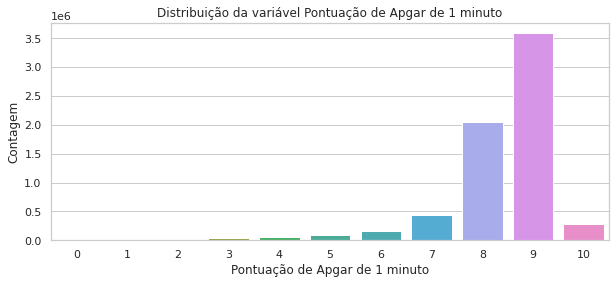

In [ ]:
variavel = 'cd_apgar1'
plt.figure(figsize=(10,4))
titulo = "Distribuição da variável Pontuação de Apgar de 1 minuto"
label_X =  "Pontuação de Apgar de 1 minuto"
label_Y = "Contagem"


ax = sns.countplot(x=variavel, dodge=False, data = df)
ax.set(xlabel=label_X)
ax.set(ylabel=label_Y)
ax.set_title(titulo)
ax.figure.savefig("graf.png")

In [ ]:
# media Semana de gestação(por intervalos)
print('A média de "Pontuação de Apgar de 1 minuto" é %.0f' %(df["cd_apgar1"].mean(skipna=True)))
# mediana Semana de gestação(por intervalos)
print('A mediana de  "Pontuação de Apgar de 1 minuto" é %.0f' %(df["cd_apgar1"].median(skipna=True)))

A média de "Pontuação de Apgar de 1 minuto" é 8
A mediana de  "Pontuação de Apgar de 1 minuto" é 9


In [ ]:
print('Agrupamento da pontuação de Apgar de 1 minuto:')
print(df['cd_apgar1'].value_counts())

Agrupamento da pontuação de Apgar de 1 minuto:
9     3586024
8     2049773
7      435949
10     285437
6      164214
5       92981
4       56688
3       37211
2       26616
1       18619
0        6710
Name: cd_apgar1, dtype: int64


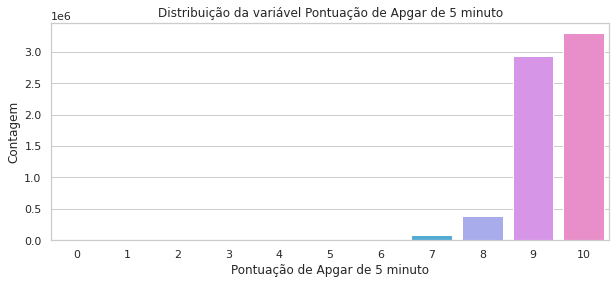

In [ ]:
variavel = 'cd_apgar5'
plt.figure(figsize=(10,4))
titulo = "Distribuição da variável Pontuação de Apgar de 5 minuto"
label_X = "Pontuação de Apgar de 5 minuto"
label_Y = "Contagem"

ax = sns.countplot(x=variavel, dodge=False, data = df)
ax.set(xlabel=label_X)
ax.set(ylabel=label_Y)
ax.set_title(titulo)
ax.figure.savefig("graf.png")

In [ ]:
# media Semana de gestação(por intervalos)
print('A média de "Pontuação de Apgar de 5 minuto" é %.0f' %(df["cd_apgar5"].mean(skipna=True)))
# mediana Semana de gestação(por intervalos)
print('A mediana de  "Pontuação de Apgar de 5 minuto" é %.0f' %(df["cd_apgar5"].median(skipna=True)))

A média de "Pontuação de Apgar de 5 minuto" é 9
A mediana de  "Pontuação de Apgar de 5 minuto" é 9


In [ ]:
print('Agrupamento da pontuação de Apgar de 5 minuto:')
print(df['cd_apgar5'].value_counts())

Agrupamento da pontuação de Apgar de 5 minuto:
10    3295767
9     2929836
8      381732
7       80428
6       27413
5       14939
1        8340
4        7703
2        4974
3        4782
0        4308
Name: cd_apgar5, dtype: int64


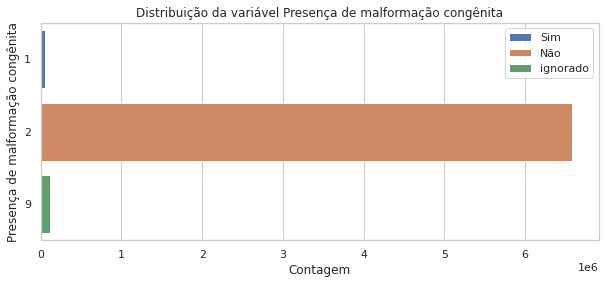

In [ ]:
variavel = 'has_congenital_malformation'
plt.figure(figsize=(10,4))
titulo = "Distribuição da variável Presença de malformação congênita"
label_Y = "Presença de malformação congênita"
label_X = "Contagem"
legendas = ["Sim", #1
            "Não", #2
            "ignorado"] #9

ax = sns.countplot(y=variavel, hue=variavel, dodge=False, data = df)
ax.set(xlabel=label_X)
ax.set(ylabel=label_Y)
ax.set_title(titulo)
ax.legend(loc='upper right', labels=legendas)
ax.figure.savefig("graf.png")

In [ ]:
# media Semana de gestação(por intervalos)
print('A média de "Presença de malformação congênita" é %.0f' %(df["has_congenital_malformation"].mean(skipna=True)))
# mediana Semana de gestação(por intervalos)
print('A mediana de  "Presença de malformação congênita" é %.0f' %(df["has_congenital_malformation"].median(skipna=True)))

A média de "Presença de malformação congênita" é 2
A mediana de  "Presença de malformação congênita" é 2


In [ ]:
print('Agrupamento da Presença de malformação congênita:')
print(df['has_congenital_malformation'].value_counts())

Agrupamento da Presença de malformação congênita:
2    6583419
9     119269
1      57534
Name: has_congenital_malformation, dtype: int64


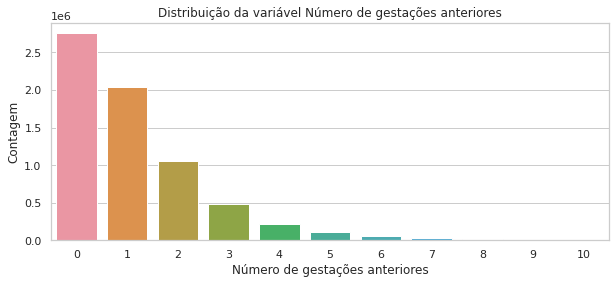

In [ ]:
variavel = 'num_previous_gestations'
plt.figure(figsize=(10,4))
titulo = "Distribuição da variável Número de gestações anteriores"
label_X = "Número de gestações anteriores"
label_Y = "Contagem"

ax = sns.countplot(x=variavel, dodge=False, data = df)
ax.set(xlabel=label_X)
ax.set(ylabel=label_Y)
ax.set_title(titulo)
ax.figure.savefig("graf.png")

In [ ]:
# media Semana de gestação(por intervalos)
print('A média de "Número de gestações anteriores" é %.0f' %(df["num_previous_gestations"].mean(skipna=True)))
# mediana Semana de gestação(por intervalos)
print('A mediana de  "Número de gestações anteriores" é %.0f' %(df["num_previous_gestations"].median(skipna=True)))

A média de "Número de gestações anteriores" é 1
A mediana de  "Número de gestações anteriores" é 1


In [ ]:
print('Agrupamento do Número de gestações anteriores da mãe:')
print(df['num_previous_gestations'].value_counts())

Agrupamento do Número de gestações anteriores da mãe:
0     2756502
1     2040006
2     1051312
3      481039
4      220951
5      104053
6       52505
7       27116
8       14598
9        7808
10       4332
Name: num_previous_gestations, dtype: int64


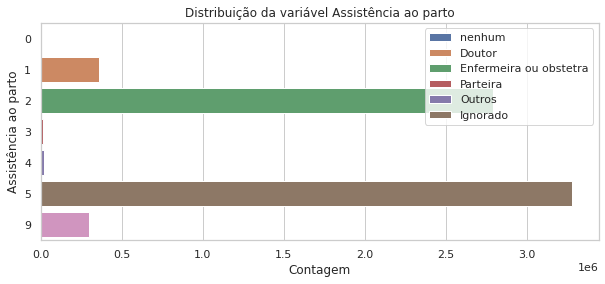

In [ ]:
variavel = 'tp_childbirth_care'
plt.figure(figsize=(10,4))
titulo = "Distribuição da variável Assistência ao parto"
label_Y = "Assistência ao parto"
label_X = "Contagem"
legendas = ["nenhum", #0
            "Doutor", #1
            "Enfermeira ou obstetra",#2
            "Parteira", #3
            "Outros",#4
            "Ignorado"] #9

ax = sns.countplot(y=variavel, hue=variavel, dodge=False, data = df)
ax.set(xlabel=label_X)
ax.set(ylabel=label_Y)
ax.set_title(titulo)
ax.legend(loc='upper right', labels=legendas)
ax.figure.savefig("graf.png")

In [ ]:
# media Semana de gestação(por intervalos)
print('A média de "Assistência ao parto" é %.0f' %(df["tp_childbirth_care"].mean(skipna=True)))
# mediana Semana de gestação(por intervalos)
print('A mediana de  "Assistência ao parto" é %.0f' %(df["tp_childbirth_care"].median(skipna=True)))

A média de "Assistência ao parto" é 4
A mediana de  "Assistência ao parto" é 5


In [ ]:
print('Agrupamento do Assistência ao parto:')
print(df['tp_childbirth_care'].value_counts())

Agrupamento do Assistência ao parto:
5    3279141
2    2792342
1     359033
9     295227
4      21801
3      12669
0          9
Name: tp_childbirth_care, dtype: int64


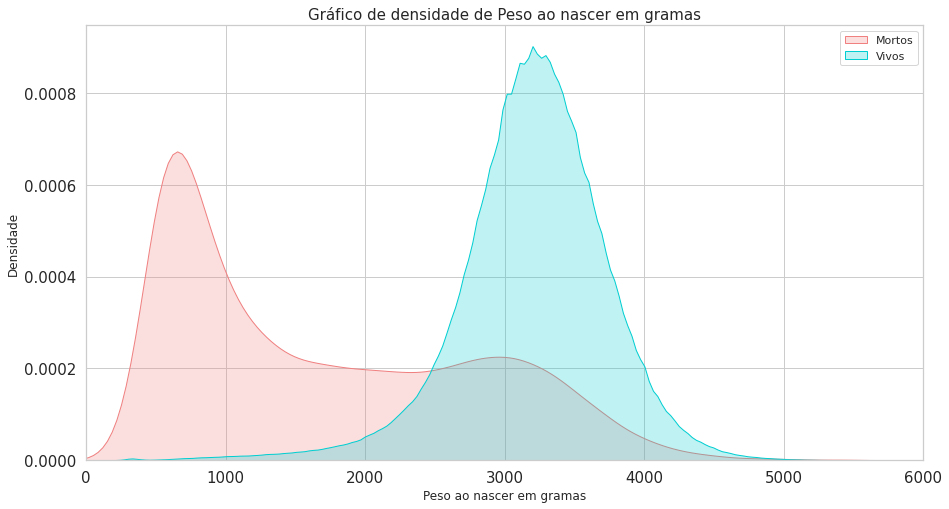

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["newborn_weight"][df.is_neonatal_death == 1], color="lightcoral", shade=True)
sns.kdeplot(df["newborn_weight"][df.is_neonatal_death == 0], color="darkturquoise", shade=True)
plt.legend(['Mortos', 'Vivos'])
plt.title('Gráfico de densidade de Peso ao nascer em gramas', fontsize=15)
ax.set(xlabel='Peso ao nascer em gramas')
ax.set(ylabel='Densidade')
ax.tick_params(labelsize=15)
plt.xlim(0,6000)
plt.show()

[WARNING] /usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



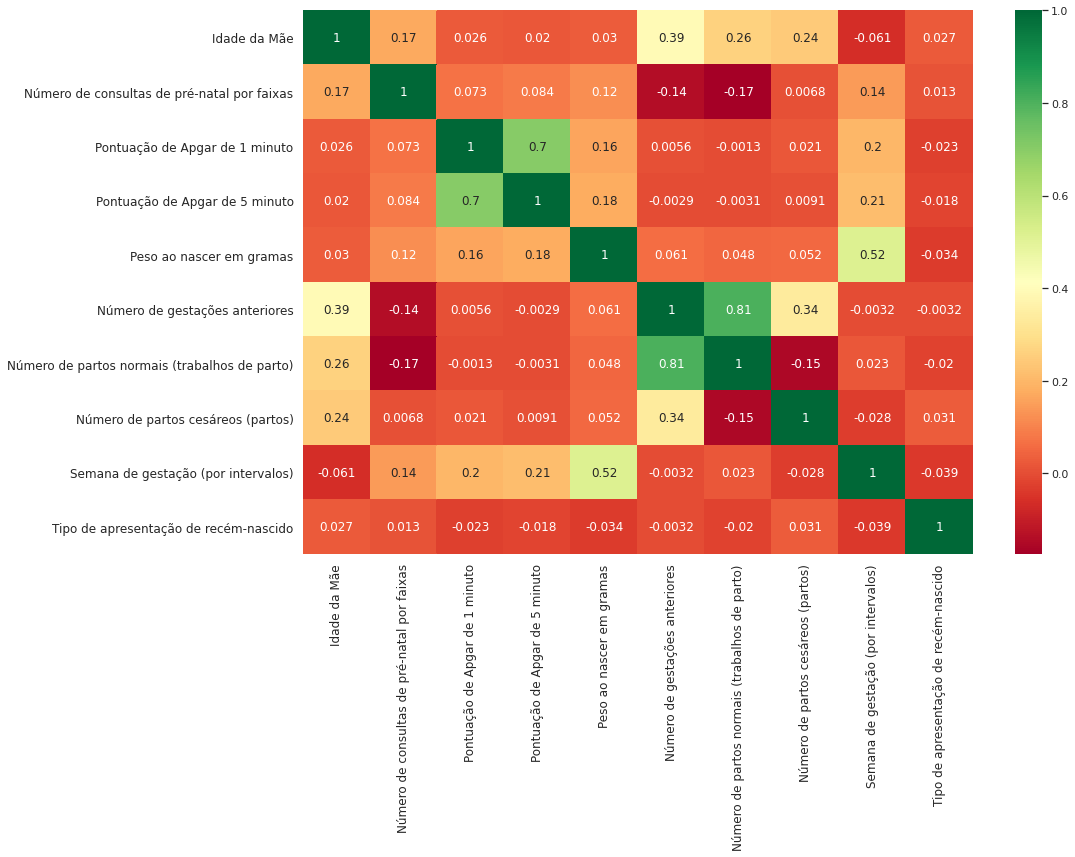

In [ ]:
X = df[['maternal_age',
       'num_prenatal_appointments',
       'cd_apgar1' ,
       'cd_apgar5',
       'newborn_weight',
       'num_previous_gestations',
       'num_normal_labors',
       'num_cesarean_labor',
       'gestaional_week',
       'tp_newborn_presentation']]

X.rename(columns = {'maternal_age':'Idade da Mãe',
                    'num_prenatal_appointments':'Número de consultas de pré-natal por faixas'
                    ,'cd_apgar1':'Pontuação de Apgar de 1 minuto' ,
                    'cd_apgar5':'Pontuação de Apgar de 5 minuto',
                    'newborn_weight':'Peso ao nascer em gramas',
                    
                    'num_previous_gestations':'Número de gestações anteriores',
                    'num_normal_labors':'Número de partos normais (trabalhos de parto)',
                    'num_cesarean_labor':'Número de partos cesáreos (partos)'
                    ,'gestaional_week':'Semana de gestação (por intervalos)',
                    'tp_newborn_presentation':'Tipo de apresentação de recém-nascido'
                    }, inplace=True)

plt.subplots(figsize=(15, 10))
plt.tick_params(labelsize=12)
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Distribuição por raça

[Text(0, 0.5, 'Idade da mãe')]

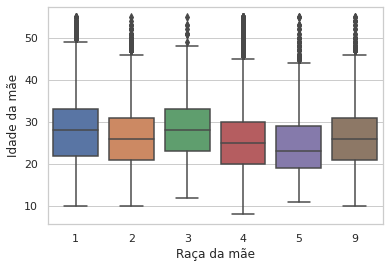

In [ ]:
ax = sns.boxplot(y="maternal_age", x="tp_maternal_race", data=df)
ax.set(xlabel="Raça da mãe")
ax.set(ylabel="Idade da mãe")

[Text(0, 0.5, 'Peso ao nascer')]

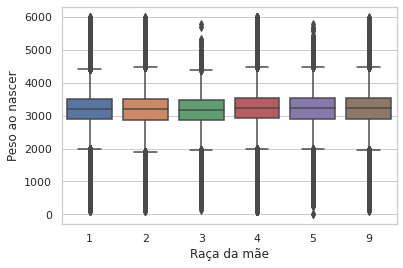

In [ ]:
ax = sns.boxplot(y="newborn_weight", x="tp_maternal_race", data=df)
ax.set(xlabel="Raça da mãe")
ax.set(ylabel="Peso ao nascer")

[Text(0, 0.5, 'Semanas de gestação')]

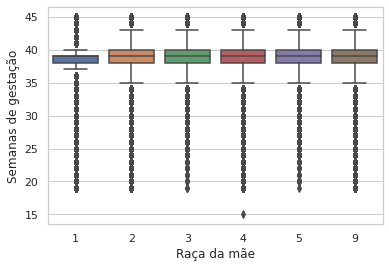

In [ ]:
ax=sns.boxplot(y="gestaional_week", x="tp_maternal_race", data=df)
ax.set(xlabel="Raça da mãe")
ax.set(ylabel="Semanas de gestação")

# Distribuição por estado civil

[Text(0, 0.5, 'Peso ao nascer')]

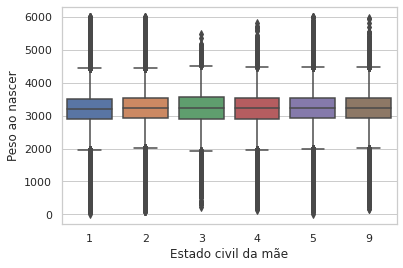

In [ ]:
ax=sns.boxplot(y="newborn_weight", x="tp_marital_status", data=df)
ax.set(xlabel="Estado civil da mãe")
ax.set(ylabel="Peso ao nascer")

[Text(0, 0.5, 'Semanas de gestação')]

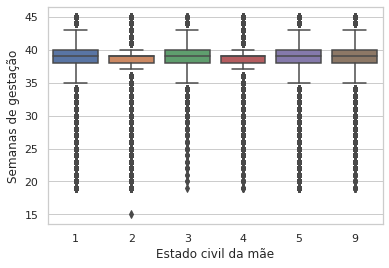

In [ ]:

ax=sns.boxplot(y="gestaional_week", x="tp_marital_status", data=df)
ax.set(xlabel="Estado civil da mãe")
ax.set(ylabel="Semanas de gestação")

[Text(0, 0.5, 'Idade da mãe')]

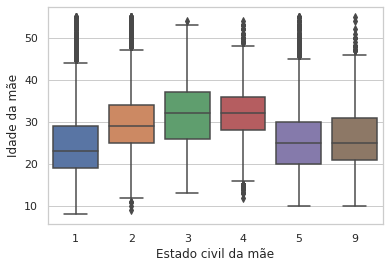

In [ ]:
ax=sns.boxplot(y="maternal_age", x="tp_marital_status", data=df)
ax.set(xlabel="Estado civil da mãe")
ax.set(ylabel="Idade da mãe")

# Distribuição por tp_maternal_schooling

[Text(0, 0.5, 'Idade da mãe')]

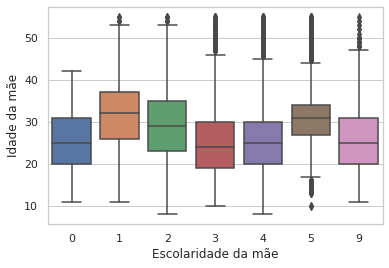

In [ ]:
ax=sns.boxplot(y="maternal_age", x="tp_maternal_schooling", data=df)
ax.set(xlabel="Escolaridade da mãe")
ax.set(ylabel="Idade da mãe")

[Text(0, 0.5, 'Peso ao nascer')]

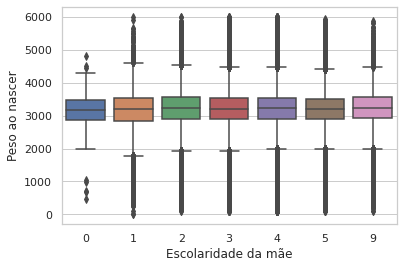

In [ ]:
ax=sns.boxplot(y="newborn_weight", x="tp_maternal_schooling", data=df)
ax.set(xlabel="Escolaridade da mãe")
ax.set(ylabel="Peso ao nascer")

[Text(0, 0.5, 'Semanas de gestação')]

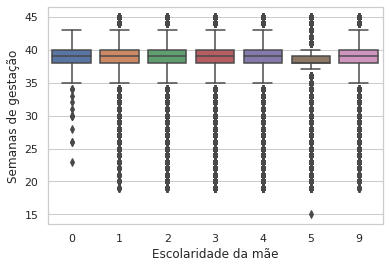

In [ ]:
ax=sns.boxplot(y="gestaional_week", x="tp_maternal_schooling", data=df)
ax.set(xlabel="Escolaridade da mãe")
ax.set(ylabel="Semanas de gestação")